<a href="https://colab.research.google.com/github/MahmudShuvo/Sentiment-Analysis-using-ML/blob/main/Sentiment_anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.8 MB/s eta 0:00:00


Label distribution before balancing:
TEXT TYPE
Depressed        1318
Paranoia         1208
Anxiety          1122
PTSD             1000
BIPOLAR           901
Schizophrenia     594
Name: count, dtype: int64

Logistic Regression Report:
               precision    recall  f1-score   support

      Anxiety       0.86      0.75      0.80       220
      BIPOLAR       0.56      0.59      0.58       165
    Depressed       0.70      0.57      0.63       286
         PTSD       0.52      0.64      0.57       191
     Paranoia       0.94      0.96      0.95       246
Schizophrenia       0.73      0.89      0.80       121

     accuracy                           0.72      1229
    macro avg       0.72      0.73      0.72      1229
 weighted avg       0.73      0.72      0.73      1229

Logistic Regression Accuracy: 0.7241659886086249

K-Nearest Neighbors Report:
               precision    recall  f1-score   support

      Anxiety       0.69      0.66      0.68       220
      BIPOLAR       0.45

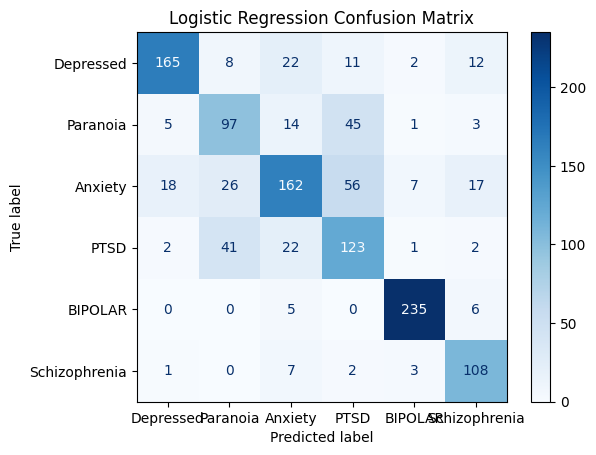

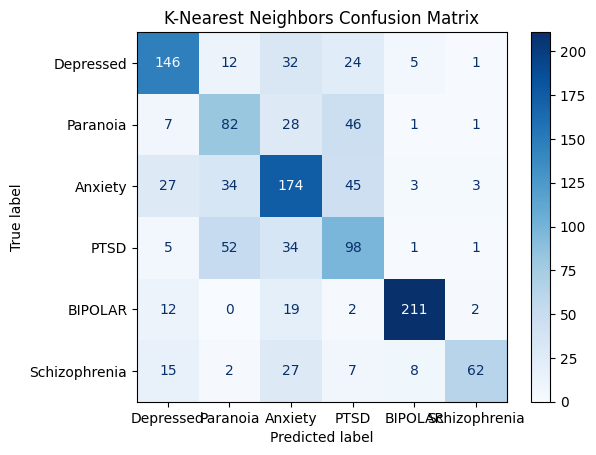

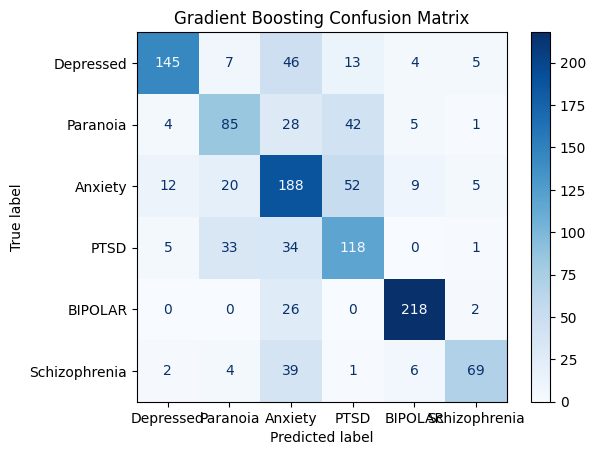

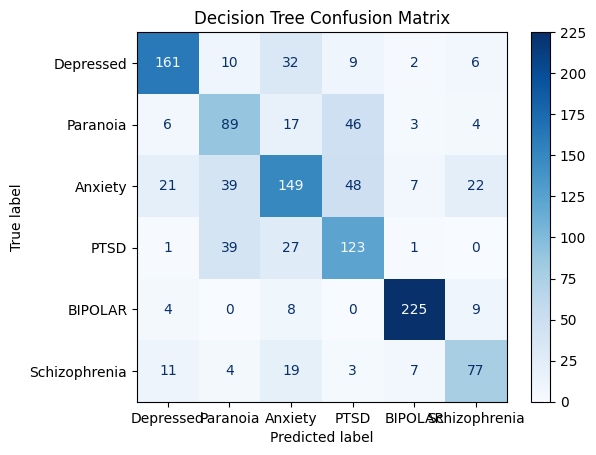

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Helper function for text cleaning
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#', '', text)
        text = re.sub(r'[^A-Za-z\s]', '', text)
        return text
    return ''

# Step 1: Load the Mental Health dataset
mental_health_file = '/content/Mental Health Analysis .csv'  # Update the path as needed
mental_health = pd.read_csv(mental_health_file, encoding='ISO-8859-1', on_bad_lines='skip')

# Step 2: Handle NaN values
mental_health = mental_health.dropna(subset=['TEXT', 'TEXT TYPE'])

# Step 3: Clean text and apply any needed transformations
mental_health['TEXT'] = mental_health['TEXT'].apply(clean_text)

# Step 4: Check the label distribution in 'TEXT TYPE'
print("Label distribution before balancing:")
print(mental_health['TEXT TYPE'].value_counts())

# Optional: If the dataset is highly imbalanced, resample to balance the dataset
class_counts = mental_health['TEXT TYPE'].value_counts()

# Step 5: Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(mental_health['TEXT'])
y = mental_health['TEXT TYPE']

# Step 6: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train multiple models
# Logistic Regression
log_reg = LogisticRegression(max_iter=200, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Step 8: Evaluate the models
# Logistic Regression evaluation
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# K-Nearest Neighbors evaluation
print("\nK-Nearest Neighbors Report:")
print(classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))

# Gradient Boosting evaluation
print("\nGradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# Decision Tree evaluation
print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Step 9: Display confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_counts.index.tolist())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrices for the models
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree Confusion Matrix")


Cleaned dataset after removing NaN values:
                                TEXT  TEXT TYPE
0            Heavy heart, empty soul  Depressed
1  A heart in pieces, a soul in pain  Depressed
2  When happiness feels out of reach  Depressed
3            Lost in a world of gray  Depressed
4           Rainy days match my mood  Depressed

Label distribution after cleaning:
TEXT TYPE
Depressed        1318
Paranoia         1208
Anxiety          1122
PTSD             1000
BIPOLAR           901
Schizophrenia     594
Name: count, dtype: int64
Logistic Regression - Epoch 1/10, Accuracy: 0.7242
Logistic Regression - Epoch 2/10, Accuracy: 0.7242
Logistic Regression - Epoch 3/10, Accuracy: 0.7242
Logistic Regression - Epoch 4/10, Accuracy: 0.7242
Logistic Regression - Epoch 5/10, Accuracy: 0.7242
Logistic Regression - Epoch 6/10, Accuracy: 0.7242
Logistic Regression - Epoch 7/10, Accuracy: 0.7242
Logistic Regression - Epoch 8/10, Accuracy: 0.7242
Logistic Regression - Epoch 9/10, Accuracy: 0.7242
Logist

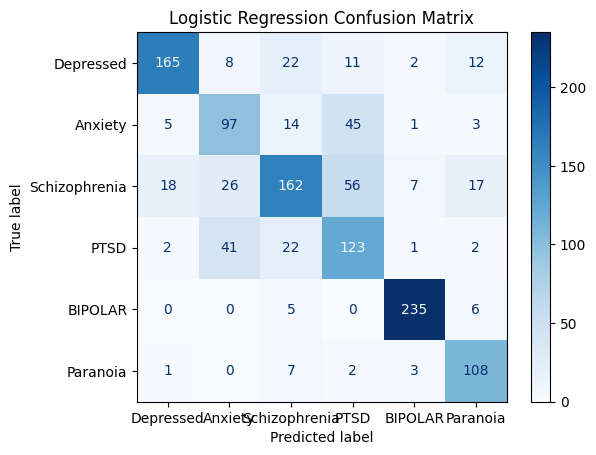

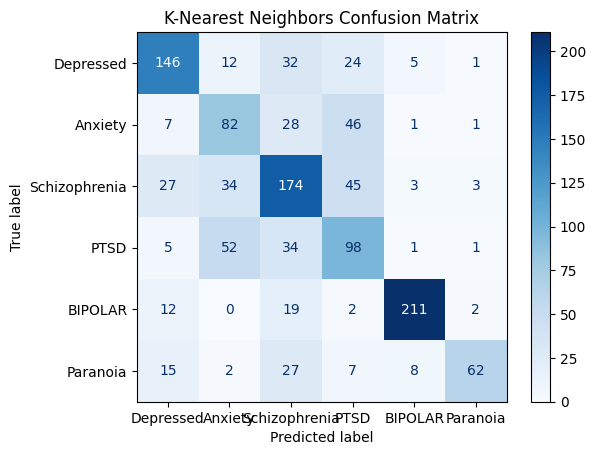

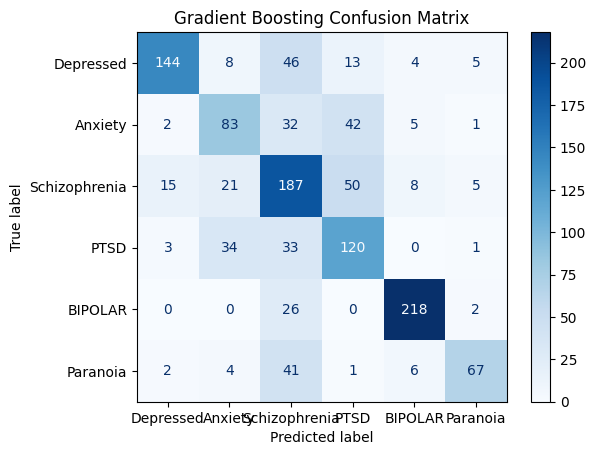

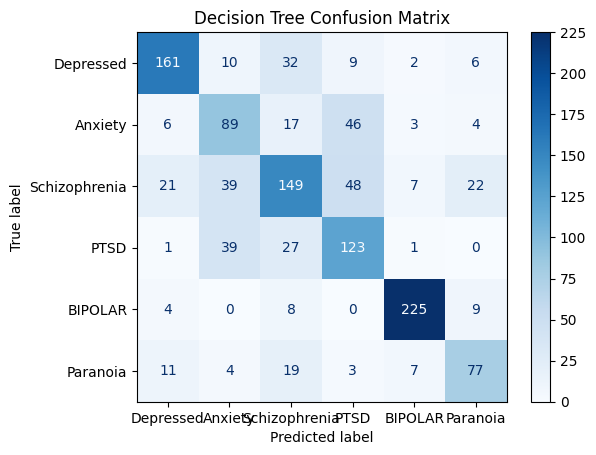

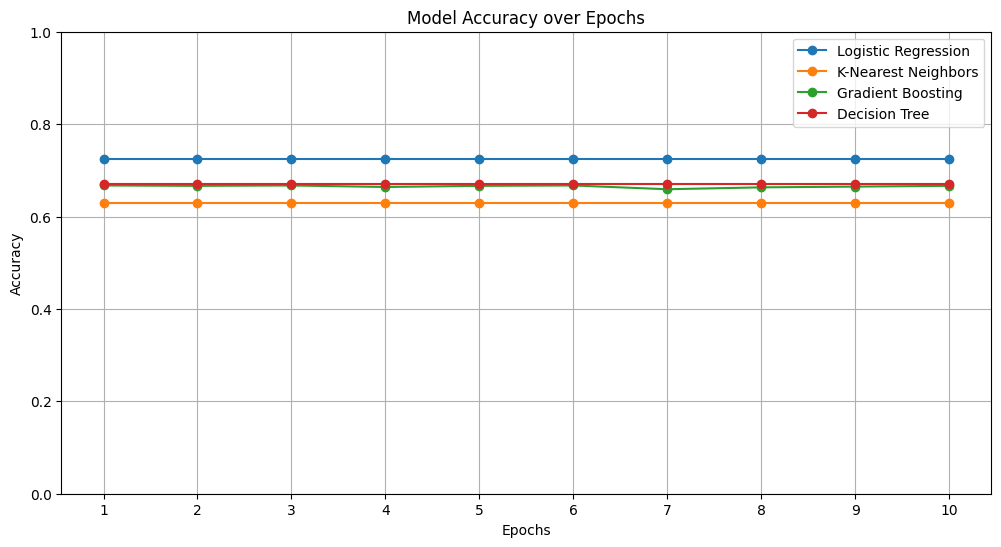

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Helper function for text cleaning
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#', '', text)
        text = re.sub(r'[^A-Za-z\s]', '', text)
        return text
    return ''

# Step 1: Load the Mental Health dataset
mental_health_file = '/content/Mental Health Analysis .csv'  # Update the path as needed
mental_health = pd.read_csv(mental_health_file, encoding='ISO-8859-1', on_bad_lines='skip')

# Step 2: Handle NaN values
mental_health = mental_health.dropna(subset=['TEXT', 'TEXT TYPE'])

# Display the cleaned dataset
print("Cleaned dataset after removing NaN values:")
print(mental_health.head())

# Step 3: Clean text and apply any needed transformations
mental_health['TEXT'] = mental_health['TEXT'].apply(clean_text)

# Step 4: Check the label distribution in 'TEXT TYPE'
print("\nLabel distribution after cleaning:")
print(mental_health['TEXT TYPE'].value_counts())

# Step 5: Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(mental_health['TEXT'])
y = mental_health['TEXT TYPE']

# Step 6: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train models with epochs for accuracy logging
epochs = 10  # Set the number of epochs

# Logistic Regression
log_reg = LogisticRegression(max_iter=200, class_weight='balanced')

# List to store accuracy for each epoch
log_reg_accuracies = []

for epoch in range(epochs):
    log_reg.fit(X_train, y_train)
    y_pred_log = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_log)
    log_reg_accuracies.append(accuracy)
    print(f"Logistic Regression - Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn_accuracies = []

for epoch in range(epochs):
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    knn_accuracies.append(accuracy)
    print(f"K-Nearest Neighbors - Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}")

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_accuracies = []

for epoch in range(epochs):
    gb_clf.fit(X_train, y_train)
    y_pred_gb = gb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_gb)
    gb_accuracies.append(accuracy)
    print(f"Gradient Boosting - Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}")

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_accuracies = []

for epoch in range(epochs):
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_tree)
    tree_accuracies.append(accuracy)
    print(f"Decision Tree - Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}")

# Step 8: Display confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mental_health['TEXT TYPE'].unique())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrices for the models
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree Confusion Matrix")

# Step 9: Optionally, plot accuracy trends
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), log_reg_accuracies, marker='o', label='Logistic Regression')
plt.plot(range(1, epochs + 1), knn_accuracies, marker='o', label='K-Nearest Neighbors')
plt.plot(range(1, epochs + 1), gb_accuracies, marker='o', label='Gradient Boosting')
plt.plot(range(1, epochs + 1), tree_accuracies, marker='o', label='Decision Tree')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs + 1))
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()
